# Mini Project (Unsupervised Learning)
---
# Principal Component Analysis of Wine Data
---

## Steps involved
PCA involves following broad level steps –

    1. Standardize the d-dimensional dataset.
    2. Construct the covariance matrix.
    3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
    4. Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new   feature subspace (k≤d)
    5. Construct a projection matrix W from the "top" k eigenvectors.
    6. Transform the d-dimensional input dataset x using the projection matrix W to obtain the new k-dimensional feature subspace

In [37]:
# Import the modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore


In [7]:
# Read the dataset
dataset = pd.read_csv("Datasets/wine.data", header=None)


In [8]:
# Descriptive analytics
print("Shape of the dataset: ", dataset.shape)


Shape of the dataset:  (178, 14)


In [10]:
# Displaying the top 5 rows of the dataset
dataset.head(5)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
# Check for null values
dataset.isnull().values.sum()


0

### Attribute definition

1st attribute is **class identifier (1-3)**. Other attributes are below:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline   

So we will consider 13 attributes for PCA.


In [18]:
# Excluding first attribute
X = dataset.iloc[:, 1:].values


### Standardizing the 13-dimensional dataset

We will use the `StandardScaler` class from `sklearn.preprocessing` library to standardize the dataset.

In [22]:
# Standardize the dataset
sc_X = StandardScaler()
X_std = sc_X.fit_transform(X)

In [25]:
# Display the standardized dataset
X_std[:3, :]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

### Constructing the covariance matrix

We will use `cov` function from `numpy` module to find the covariance matrix.


In [33]:
cov_matrix = np.cov(X_std.transpose())


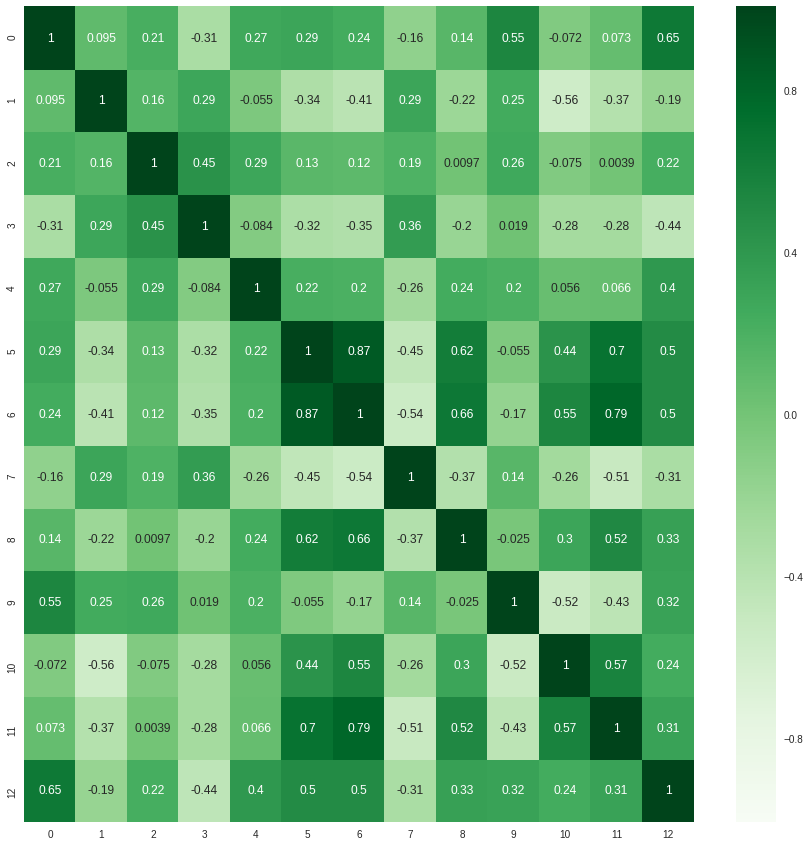

In [49]:
# Print the covariance matrix
plt.figure(figsize=(15, 15))
sns.heatmap(cov_matrix, annot=True, cmap="Greens")

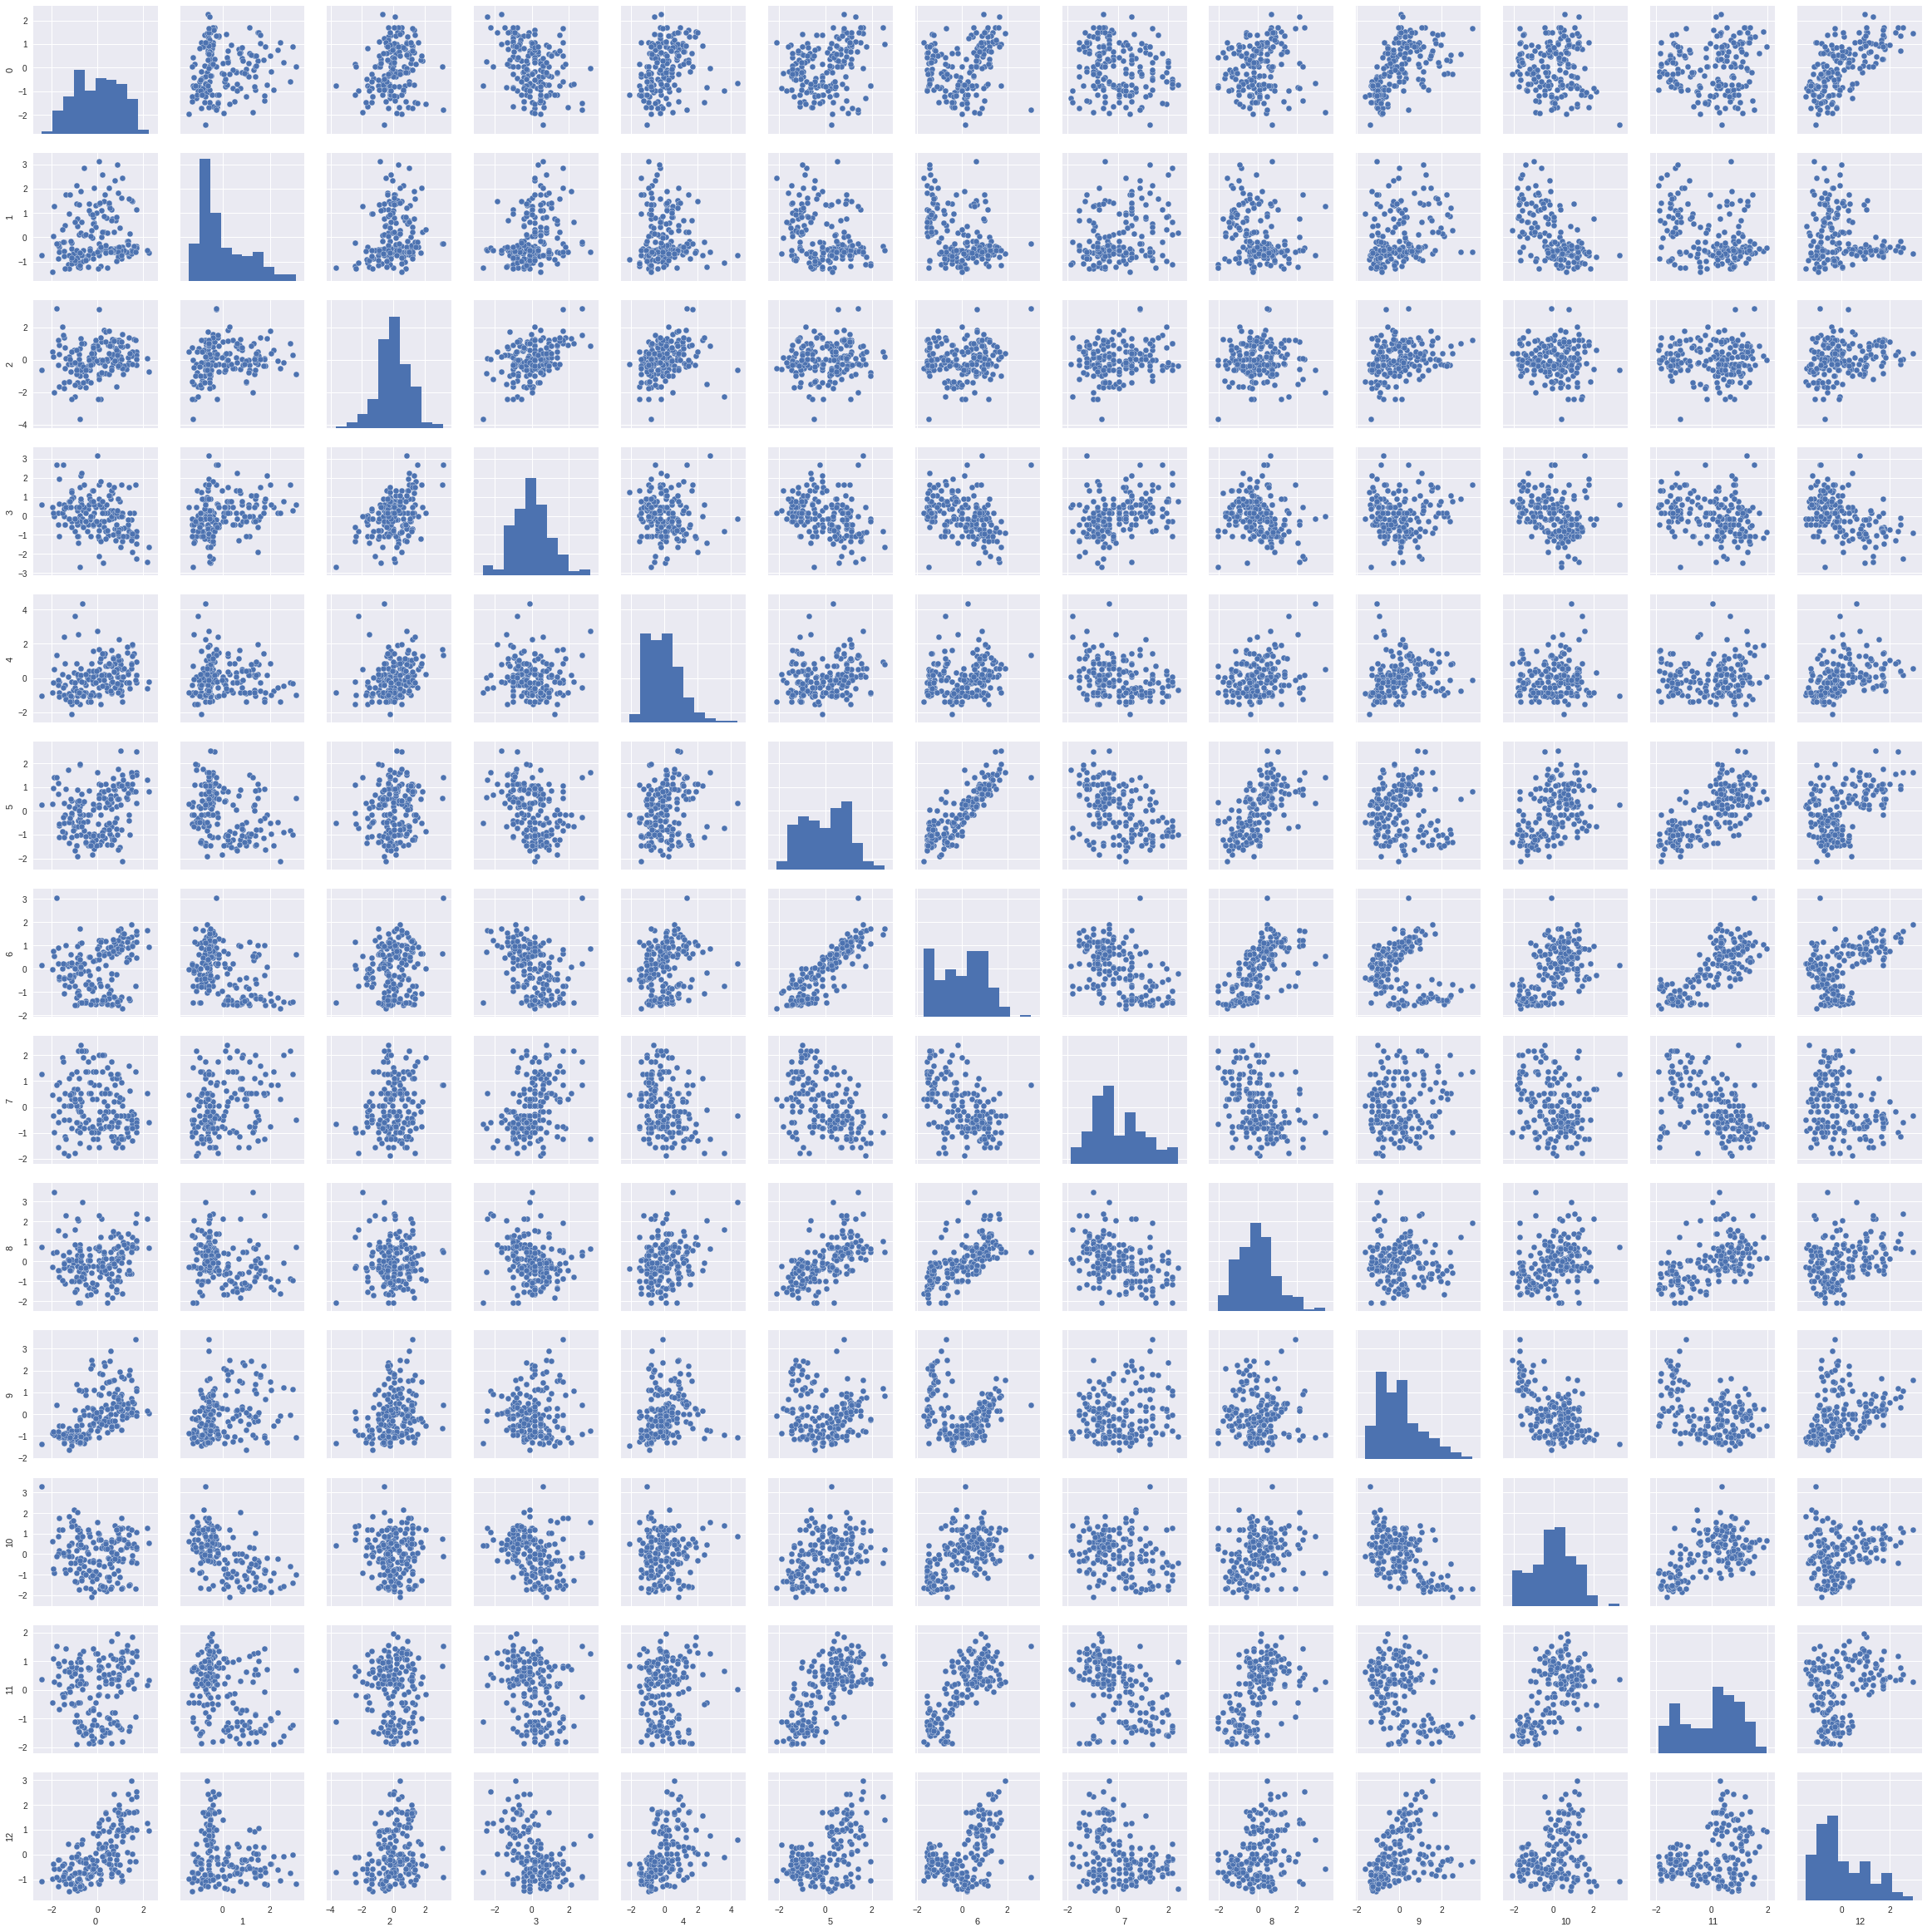

In [51]:
# Pair plot for this dataset
sns.pairplot(pd.DataFrame(X_std))

### Decomposing the covariance matrix into its eigenvectors and eigenvalues

To do this we will use `linalg.eig` from `numpy` module.

In [52]:
# Converting to eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [68]:
0.04166172048200001 ** 0.5

0.20411202924374647

In [75]:
# Display the eigen Vectors
print("Eigen Vectors:")
pd.DataFrame(eig_vecs)

Eigen Vectors


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.144329,0.483652,-0.207383,0.017856,-0.265664,0.213539,0.056396,-0.014970,0.396139,-0.266286,-0.508619,-0.225917,0.211605
1,0.245188,0.224931,0.089013,-0.536890,0.035214,0.536814,-0.420524,-0.025964,0.065827,0.121696,0.075283,0.076486,-0.309080
2,0.002051,0.316069,0.626224,0.214176,-0.143025,0.154475,0.149171,0.141218,-0.170260,-0.049622,0.307694,-0.498691,-0.027125
3,0.239320,-0.010591,0.612080,-0.060859,0.066103,-0.100825,0.286969,-0.091683,0.427970,-0.055743,-0.200449,0.479314,0.052799
4,-0.141992,0.299634,0.130757,0.351797,0.727049,0.038144,-0.322883,-0.056774,-0.156361,0.062220,-0.271403,0.071289,0.067870
5,-0.394661,0.065040,0.146179,-0.198068,-0.149318,-0.084122,0.027925,0.463908,-0.405934,-0.303882,-0.286035,0.304341,-0.320131
6,-0.422934,-0.003360,0.150682,-0.152295,-0.109026,-0.018920,0.060685,-0.832257,-0.187245,-0.042899,-0.049578,-0.025694,-0.163151
7,0.298533,0.028779,0.170368,0.203301,-0.500703,-0.258594,-0.595447,-0.114040,-0.233285,0.042352,-0.195501,0.116896,0.215535
8,-0.313429,0.039302,0.149454,-0.399057,0.136860,-0.533795,-0.372139,0.116917,0.368227,-0.095553,0.209145,-0.237363,0.134184
9,0.088617,0.529996,-0.137306,-0.065926,-0.076437,-0.418644,0.227712,0.011993,-0.033797,0.604222,-0.056218,0.031839,-0.290775


In [74]:
# Display the eigen values
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.732437,2.511081,1.454242,0.924166,0.858049,0.645282,0.554141,0.103962,0.350466,0.169724,0.290512,0.227064,0.25232


### Selecting k eigenvectors

Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new   feature subspace (k≤d)

Lets select the first 7 eigen vectors where eigenvalues >= 0.5

In [76]:
eig_vecs_selected = eig_vecs[:7, :7]

In [78]:
# Display the eigen Vectors
print("First 7 Eigen Vectors:")
pd.DataFrame(eig_vecs_selected)

First 7 Eigen Vectors:


,0,1,2,3,4,5,6
0,-0.144329,0.483652,-0.207383,0.017856,-0.265664,0.213539,0.056396
1,0.245188,0.224931,0.089013,-0.536890,0.035214,0.536814,-0.420524
2,0.002051,0.316069,0.626224,0.214176,-0.143025,0.154475,0.149171
3,0.239320,-0.010591,0.612080,-0.060859,0.066103,-0.100825,0.286969
4,-0.141992,0.299634,0.130757,0.351797,0.727049,0.038144,-0.322883
5,-0.394661,0.065040,0.146179,-0.198068,-0.149318,-0.084122,0.027925
6,-0.422934,-0.003360,0.150682,-0.152295,-0.109026,-0.018920,0.060685
